<a href="https://colab.research.google.com/github/SreevalliSreenivasan/keller-lab.github.io/blob/main/Data_Clean_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Adapted from Dirty Data by Dartmouth Research Computing, jhub.dartmouth.edu

Author : Simon Stone, Edited : Sreevalli S

In this tutorial, we will "clean up" data. Trying to keep the format and structure of data consistent.

We will:
1.Replace missing values

2.Remove duplicate values




# Upload data

We will upload file onto the drive.



In [1]:
import pandas as pd

In [65]:
#upload the file from your system
from google.colab import files
uploaded = files.upload()

Saving lego_data_tutorial-6.csv to lego_data_tutorial-6.csv


---

In [66]:
dataset= pd.read_csv('lego_data_tutorial-6.csv', encoding = 'unicode_escape', engine ='python')

# Analyze Data

With all data now gathered in a single dataframe, we can get some basic statistics on our (uncleaned) dataset:

We can see that the columns contain up to 12143 entries. Some of the columns contain numeric values, some contain strings. A few variables are categorical with only a small number of unique levels.

Let's visualize some of the columns to get a general "feel" for the dataset:

In [67]:
dataset.describe()

,list_price,num_reviews,piece_count,play_rating,prod_id,overall_rating,value_rating
count,12143.000000,10537.000000,12143.000000,10385.000000,1.214300e+04,10537.000000,10365.000000
mean,65.356322,16.914397,494.707568,4.339557,6.000539e+04,4.513951,4.228365
std,92.194041,36.520634,826.136820,0.649586,1.645774e+05,0.518475,0.660396
min,2.272400,1.000000,1.000000,1.000000,6.300000e+02,1.800000,1.000000
25%,20.297100,2.000000,97.000000,4.000000,2.103500e+04,4.300000,4.000000
50%,36.587800,6.000000,217.000000,4.500000,4.207000e+04,4.700000,4.300000
75%,70.992900,14.000000,544.000000,4.800000,7.092200e+04,5.000000,4.700000
max,1104.870000,367.000000,7541.000000,5.000000,2.000431e+06,5.000000,5.000000


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


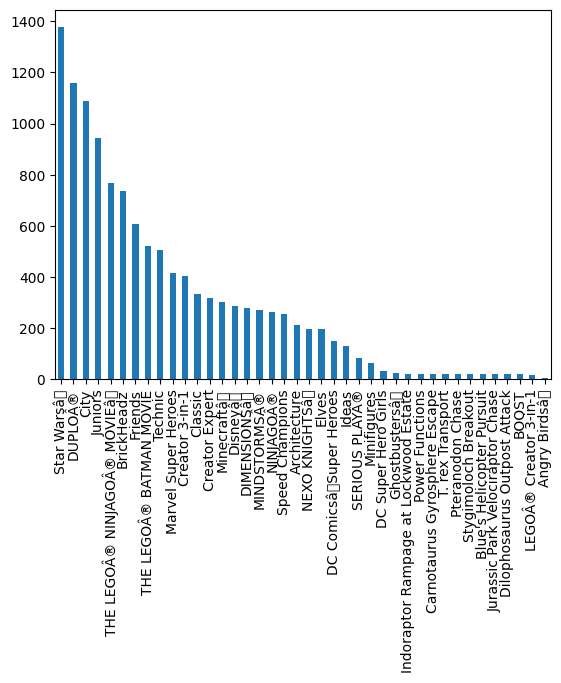

In [68]:
dataset.theme_name.value_counts().plot.bar()

<Axes: title={'center': 'list_price'}, xlabel='theme_name'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 132 (\x84) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 132 (\x84) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


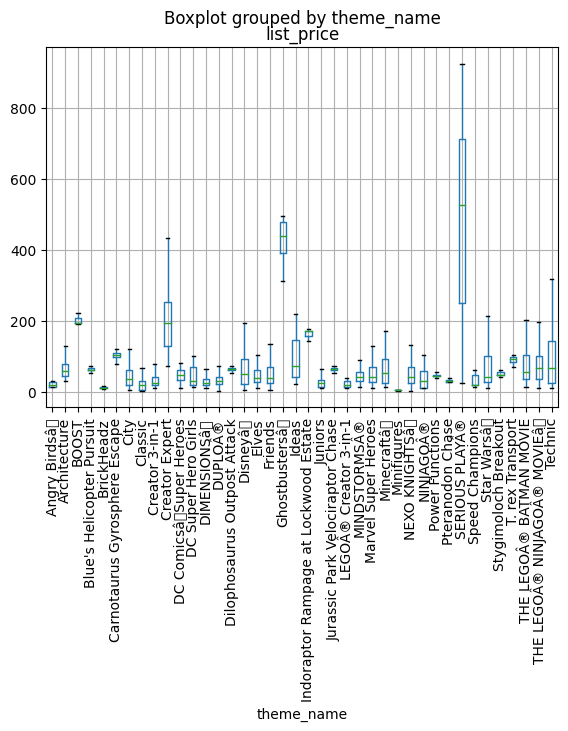

In [69]:
dataset.boxplot(column='list_price', by='theme_name', rot=90, showfliers=False)

<Axes: title={'center': 'list_price'}, xlabel='country'>

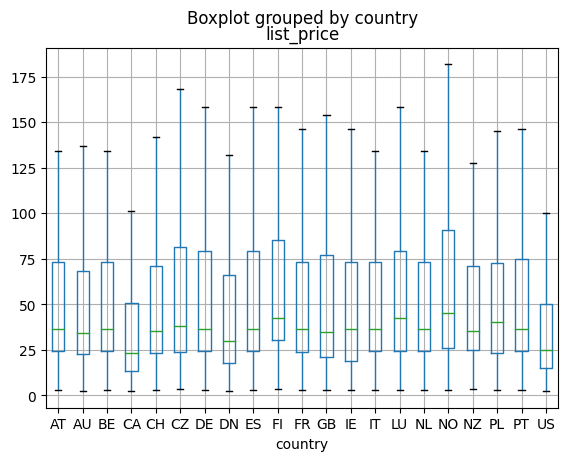

In [70]:
dataset.boxplot(column='list_price', by='country', showfliers=False)

Now that we have a basic idea of our dataset, we can start looking for inconsistencies. The first thing we should do is check for duplicated rows:

In [71]:
dataset.duplicated().any()

True

We have some duplicates in our dataset! We will remove them in the cleaning step.

Next, let's check for missing entries:

In [72]:
dataset.isna().any()

list_price           False
num_reviews           True
piece_count          False
play_rating           True
prod_short_desc       True
prod_id              False
prod_long_desc       False
review_difficulty     True
set_name             False
overall_rating        True
theme_name            True
value_rating          True
country              False
dtype: bool

There are indeed missing entries in various columns. Filling missing entries requires case-by-case analysis, which will do during the cleaning step.

There is, of course, a *lot* more to explore (in fact, we offer an entire workshop on Exploratory Data Analysis), but let us move on for now and start cleaning our data!

---

#  Clean Data

Let's summarize what kind of dirt we found during the analysis step:

- Some rows are duplicated
- Some entries are missing

In this step, we will work through this list and clean up the mess.

## Duplicated rows

We already now from the analysis that there are some duplicated rows. Let's get a little more specific here and find out how many rows exactly are duplicated:

In [73]:
num_duplicated = dataset.duplicated().sum()
print(f"There are {num_duplicated} duplicated rows, which is {num_duplicated/dataset.shape[0]:.2f} % of the total data.")

There are 1271 duplicated rows, which is 0.10 % of the total data.


In some contexts, duplicated rows in a dataset can be meaningful (e.g. when sampling an unchanging source repeatedly). In this case, the duplicates are most likely due to our two different data sources, which have some overlap in the scraped Lego sets. We can therefore simply drop the duplicates without losing any information;

In [74]:
dataset.drop_duplicates(inplace=True)

Missing Values

As mentioned above, filling in missing values is a case-by-case process. This process can become quite complex and is know as [imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)). Many methods and techniques can be applied to "fill in the gaps" in our data, but before we dive into it ourselves, we need to keep two things in mind:

__Imputed data is not real data!__
No matter how sophisticated our imputation technique is, we need to remind ourselves that the data we are filling in are *not* real-world data! That means, for example, that we should never validate models on datasets containing imputed values. We should also be very carefule when imputing values of a variable that will be used as the target variable in regression or classification model.

__Beware of bias!__
Imputation is data manipulation and as such almost always introduces bias into the dataset. However, not imputing missing values means we would have to drop all data points that are missing values, which may also introduce bias.

In practice, we need to carefully consider our respective scenario, weigh the damage of discarding data versus introducing artificial data, and how intrusive our chosen imputation method may be.

One important factor to consider is the proportion of missing values. Any imputation needs to be properly supported by a sufficient number of actual data points. We therefore should not try to impute 5000 missing values from only 100 known values. What exactly constitues "enough" support, however, cannot be universally stated.

Let's check our dataset and calculate the proportion of missing values for each column:

In [75]:
dataset.isna().sum() / dataset.shape[0]

list_price           0.000000
num_reviews          0.129599
piece_count          0.000000
play_rating          0.139993
prod_short_desc      0.034676
prod_id              0.000000
prod_long_desc       0.000000
review_difficulty    0.159952
set_name             0.000000
overall_rating       0.129599
theme_name           0.000276
value_rating         0.141832
country              0.000000
dtype: float64

Evidently, we have more than 80 % existing values in each column, which we will consider sufficient support to impute the remaining missing values for this exercise. Therefore, we will not have to drop any columns.

Next, we will go through the columns containing missing values and try to impute them.

 Number of reviews

The column `num_reviews` contains the number of reviews available for each set. There are quite a few missing values:

In [76]:
dataset.num_reviews.isna().sum()

1409

Let's find out which values *are* present in the column:

In [77]:
print(f"Min value: {dataset.num_reviews.min()}")
print(f"Max value: {dataset.num_reviews.max()}")
print(f"Mean value: {dataset.num_reviews.mean():.2f}")
print(f"Standard deviation: {dataset.num_reviews.std():.2f}")

Min value: 1.0
Max value: 367.0
Mean value: 17.83
Standard deviation: 38.15


Interesting find: The number of reviews is apparently only recorded when it is greater than 0! We can therefore deduce that the missing values indicate sets that have 0 reviews.

In this case, we can thus simply replace the missing values with the value 0:

In [78]:
dataset.num_reviews.fillna(0, inplace=True)

Let's check the statistics again to see how our imputation affected them:

In [79]:
print(f"Min value: {dataset.num_reviews.min()}")
print(f"Max value: {dataset.num_reviews.max()}")
print(f"Mean value: {dataset.num_reviews.mean():.2f}")
print(f"Standard deviation: {dataset.num_reviews.std():.2f}")

Min value: 0.0
Max value: 367.0
Mean value: 15.52
Standard deviation: 36.09


We can see that the mean value was affected by our imputation, meaning we shifted the distribution of this variable to the left. In this case, that makes perfect sense given that the missing values were not considered before and the mean is now actually more accurate than it was before. In general, however, we have to be very mindful that imputations may introduce distortions of the distribution that are not acceptable!

### Theme name

There is only a very small number of missing values in the column `'theme_name'`. Let's look at those entries more closely:

In [80]:
dataset[dataset['theme_name'].isna()]

,list_price,num_reviews,piece_count,play_rating,prod_short_desc,prod_id,prod_long_desc,review_difficulty,set_name,overall_rating,theme_name,value_rating,country
3730,18.2580,10.0,161,4.7,"Design, build and race an incredible McLaren s...",75880,Become a supercar designer and racing driver w...,Easy,McLaren 720S,4.9,NaN,4.7,CH
7065,48.7878,3.0,326,4.0,Have fun playing at Heartlake City Playground ...,41325,Designed by 9 year old Sienna â winner of the...,Challenging,Heartlake City Playground,3.7,NaN,3.0,IE
7164,4.8678,13.0,8,4.3,Discover new heroes and villains in LEGOÂ® Min...,71020,Bring exciting new play possibilities to exist...,Very Easy,THE LEGOÂ® BATMAN MOVIE Series 2,4.8,NaN,4.0,IE


In this case, there are so few entries that we can even consider going back to the data collection stage to find the missing information!

By simply searching for the listed sets on the [Lego website](www.lego.com) ourselves, we can find out the corresponding themes and fill them in manually:

In [81]:
dataset.at[671, 'theme_name'] = "Speed Champions"
dataset.at[724, 'theme_name'] = "Friends"
dataset.at[1432, 'theme_name'] = "Minifigures"

### Difficulty

In [82]:
dataset.review_difficulty.unique()

array(['Average', 'Easy', 'Challenging', nan, 'Very Easy',
       'Very Challenging'], dtype=object)

<Axes: >

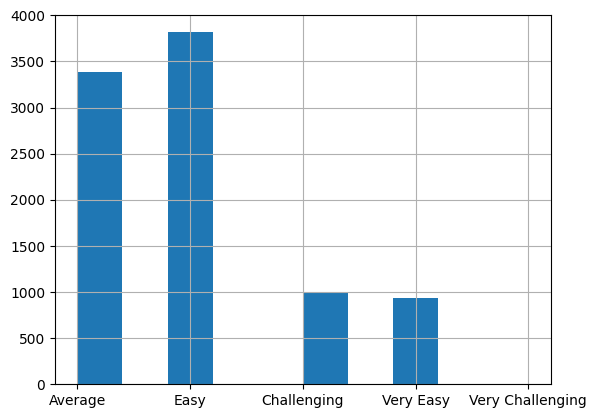

In [83]:
dataset.review_difficulty.hist()

It is reasonable to assume that the piece count has an impact on the difficulty level of a set. So let us also look at the distribution of the piece count broken down by the difficulty level:

<Axes: title={'center': 'piece_count'}, xlabel='review_difficulty'>

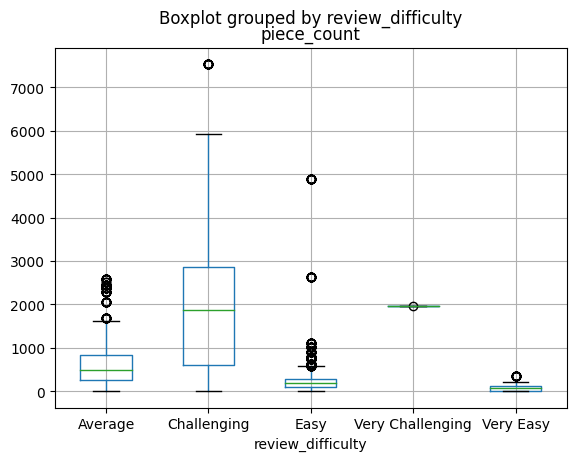

In [84]:
dataset.boxplot(column='piece_count', by='review_difficulty')

Interesting! We notice fairly distinct distributions for each difficulty level. In other words: Given a specific piece count, the difficulty levels are not equally likely!
We may also suspect a similar relationship regarding the list price:

<Axes: title={'center': 'list_price'}, xlabel='review_difficulty'>

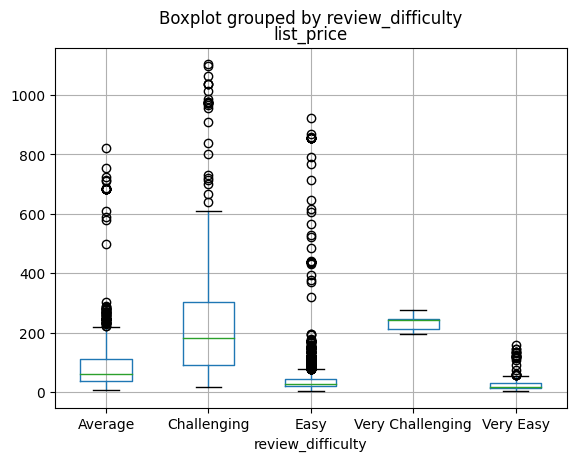

In [85]:
dataset.boxplot(column='list_price', by='review_difficulty')

Indeed, the list price shows a similar pattern.

Once again, a distinct pattern emerges!


Our brief analysis here suggests that knowing the list price and the number of pieces, we should be able to make a pretty good guess of what the difficulty would be!

To make that guess, we will use Naive Bayes classifier. In a nutshell, this classifier identifies the most likely difficulty level given a minimum age, piece count and list price. While the theory behind this goes beyond the scope of this notebook, let us know if you are interested in this topic and we would be happy to offer a whole workshop on this!

For now, let it suffice to say that our classifier needs to be trained by fitting it to the known pairs of [minimum age, piece count, list price] and corresponding difficulty level. Once it is fitted, the classifier can predict the difficulty level for any combination of piece count, and list price.

We will use the package [scikit-learn](https://scikit-learn.org/) to import an implementation of the Naive Bayes classifier:

In [86]:
from sklearn.naive_bayes import GaussianNB

# Fit the classifier using known pairs of ['piece_count', 'list_price'] and 'review_difficulty'
imputer = GaussianNB().fit(X=dataset.dropna(subset=['review_difficulty'])[['piece_count', 'list_price']], y=dataset.review_difficulty.dropna())

# Use the fitted classifier to predict a difficulty for all entries
dataset['predicted_difficulty'] = imputer.predict(dataset[['piece_count', 'list_price']])

# Fill in the missing difficulty values form the predicted levels
dataset.review_difficulty.fillna(dataset.predicted_difficulty, inplace=True)

# Drop the column 'predicted_difficulty' since it is no longer needed
dataset.drop(columns='predicted_difficulty', inplace=True)

### Short descriptions

A few short descriptions are missing from the dataset. Spot checking the affected entries reveals that these sets indeed do not have short descriptions. Therefore, we should replace the missing values with empty strings.

In [87]:
dataset.prod_short_desc.fillna("", inplace=True)

### 3.3.5 Ratings</h4>

The Lego sets are rated by the website users on three different interval scales from 1 (worst) to 5 (best): The *play experience*, the perceived *value*, and the *overall* rating. The columns `play_rating`, `value_rating`, and `overall_rating` contain the respective average rating for each set. Some sets have not been rated on every scale, so some ratings are missing. Let us take a look at the descriptive statistics of the existing ratings. This time, we will use the convenient method `describe()` on the column. Because `describe()` gives us different information depending on the type of the column, we need to convert the columns to a numeric type first:

In [88]:
dataset[['play_rating', 'value_rating', 'overall_rating']].astype("float64").describe()

,play_rating,value_rating,overall_rating
count,9350.000000,9330.000000,9463.000000
mean,4.359914,4.214630,4.511212
std,0.615536,0.664763,0.516310
min,1.000000,1.000000,1.800000
25%,4.000000,4.000000,4.300000
50%,4.500000,4.300000,4.600000
75%,4.800000,4.700000,5.000000
max,5.000000,5.000000,5.000000


We should note that if a set is missing a rating, it is not necessarily missing *all* ratings.

A reasonable assumption could be that in the absence of a play or value rating, the overall rating is a fairly good stand-in for it. We therefore start by filling in the overall rating for the missing play and/or value rating, if available:

In [89]:
dataset.play_rating.fillna(dataset["overall_rating"], inplace=True)
dataset.value_rating.fillna(dataset["overall_rating"], inplace=True)

In [90]:
dataset[['play_rating', 'value_rating', 'overall_rating']].astype("float64").describe()

,play_rating,value_rating,overall_rating
count,9463.000000,9463.000000,9463.000000
mean,4.365339,4.223449,4.511212
std,0.615306,0.665600,0.516310
min,1.000000,1.000000,1.800000
25%,4.000000,4.000000,4.300000
50%,4.500000,4.300000,4.600000
75%,4.800000,4.700000,5.000000
max,5.000000,5.000000,5.000000


As we can see, we were able to fill in a few values without affecting the statistics too much. However, there are still quite a few entries without any ratings at all!

For the purposes of this notebook, we will simply choose random values for the ratings

In [91]:
import random

existing_values = dataset[['play_rating', 'value_rating', 'overall_rating']].dropna().values

def fill_in_random_existing_value(entry):
    if entry.isna().any():
        entry = random.choice(existing_values)
    return entry

dataset[['play_rating', 'value_rating', 'overall_rating']] = dataset[['play_rating', 'value_rating', 'overall_rating']].apply(fill_in_random_existing_value, axis='columns')

# 4. Save Data
Our dataset is now fairly tidy! To save us the trouble of going through the entire process again every time we want to do something with this dataset, we can save the cleaned up version to a CSV file.

```python
some_dataFrame.to_csv(filename)
```



In [93]:
dataset.to_csv('clean_lego_sets-ENGM2024.csv')
